Gas concentration changed randomly every 80-120 seconds, including increase, decrease, and zero-level transitions. Additional predefined patterns of pure gases were inserts periodically. The chosen concentration ranges = Ethylene (0-20 ppm), Methane (0-300 ppm), anc CO (0-600 ppm) -were designed to produce similar sensor response magnitudes, makeing gas identification a complex task.

In [73]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('ethylene_methane.txt', delim_whitespace=True, skiprows=1, header=None, names=['Time','Methane','Ethylene','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16'])
# skiprow跳过第一行而names重命名，methane甲烷，ethylene乙烯

/var/folders/47/s43kdzn9469f08xhd69md8_h0000gn/T/ipykernel_57583/1552216832.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('ethylene_methane.txt', delim_whitespace=True, skiprows=1, header=None, names=['Time','Methane','Ethylene','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16'])


In [75]:
Methane_bin = []
Ethylene_bin = []

for i in df['Methane']:
    if i > 0.0:
        Methane_bin.append(int(1)) 
    else:
        Methane_bin.append(int(0))

for i in df['Ethylene']:
    if i > 0.0:
        Ethylene_bin.append(int(1))
    else:
        Ethylene_bin.append(int(0))

df['Methane Bin'] = Methane_bin
df['Ethylene Bin'] = Ethylene_bin

df.head()

,Time,Methane,Ethylene,1,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,Methane Bin,Ethylene Bin
0,0.00,0.0,0.0,-41.98,2067.64,-37.13,2.28,8.63,-26.62,-8.46,...,3437.73,2728.14,4054.03,4007.89,4478.27,5056.98,3639.09,3128.49,0,0
1,0.01,0.0,0.0,-46.50,2067.88,-28.56,13.69,-12.35,-25.81,-5.04,...,3432.44,2734.47,4038.62,4019.40,4496.72,5051.81,3636.97,3115.03,0,0
2,0.02,0.0,0.0,-36.16,2055.81,-10.89,8.63,-2.93,-30.34,-9.27,...,3438.61,2719.97,4030.92,4025.48,4489.54,5057.35,3641.81,3105.24,0,0
3,0.03,0.0,0.0,-50.36,2053.68,-31.96,-0.65,-8.29,-21.60,7.98,...,3429.51,2720.50,4040.22,4000.87,4485.44,5049.60,3642.72,3124.84,0,0
4,0.04,0.0,0.0,-37.30,2081.17,-36.16,3.26,5.05,-26.14,-7.48,...,3436.85,2719.71,4029.64,4007.25,4499.12,5057.35,3674.30,3147.59,0,0


Checking for null values if any.

In [76]:
df.isnull().sum()

Time            0
Methane         0
Ethylene        0
1               0
2               0
3               0
4               0
5               0
6               0
7               0
8               0
9               0
10              0
11              0
12              0
13              0
14              0
15              0
16              0
Methane Bin     0
Ethylene Bin    0
dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4178504 entries, 0 to 4178503
Data columns (total 21 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Time          float64
 1   Methane       float64
 2   Ethylene      float64
 3   1             float64
 4   2             float64
 5   3             float64
 6   4             float64
 7   5             float64
 8   6             float64
 9   7             float64
 10  8             float64
 11  9             float64
 12  10            float64
 13  11            float64
 14  12            float64
 15  13            float64
 16  14            float64
 17  15            float64
 18  16            float64
 19  Methane Bin   int64  
 20  Ethylene Bin  int64  
dtypes: float64(19), int64(2)
memory usage: 669.5 MB


In [78]:
df.describe()

,Time,Methane,Ethylene,1,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,Methane Bin,Ethylene Bin
count,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,...,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06
mean,2.089566e+04,5.808503e+01,4.369478e+00,2.520157e+03,1.711449e+03,2.756596e+03,3.035848e+03,1.863258e+03,2.386329e+03,2.689914e+03,...,3.541804e+03,2.823842e+03,2.301598e+03,2.024606e+03,1.687490e+03,1.806279e+03,2.309401e+03,1.862996e+03,4.426828e-01,4.314846e-01
std,1.206404e+04,7.663941e+01,5.521296e+00,2.532045e+02,1.184762e+02,1.150495e+03,1.252085e+03,1.104965e+03,1.425092e+03,1.102780e+03,...,2.607058e+02,2.002925e+02,9.875315e+02,8.246309e+02,9.865598e+02,1.102382e+03,9.652522e+02,7.658043e+02,4.967039e-01,4.952834e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-5.648000e+01,1.568880e+03,-4.778000e+01,-6.830000e+00,-1.268000e+01,-4.198000e+01,-1.528000e+01,...,2.976530e+03,2.367650e+03,6.898700e+02,5.817900e+02,4.433000e+02,4.239800e+02,7.713900e+02,5.890900e+02,0.000000e+00,0.000000e+00
25%,1.044672e+04,0.000000e+00,0.000000e+00,2.335120e+03,1.639010e+03,1.581310e+03,1.750760e+03,8.197600e+02,1.061500e+03,1.533260e+03,...,3.344630e+03,2.672740e+03,1.409680e+03,1.201660e+03,7.593200e+02,7.685600e+02,1.424110e+03,1.113520e+03,0.000000e+00,0.000000e+00
50%,2.089672e+04,0.000000e+00,0.000000e+00,2.463490e+03,1.701300e+03,2.885640e+03,3.199850e+03,1.393180e+03,1.688830e+03,2.785620e+03,...,3.481370e+03,2.782960e+03,2.174530e+03,2.072150e+03,1.266570e+03,1.332660e+03,2.165370e+03,1.839750e+03,0.000000e+00,0.000000e+00
75%,3.134324e+04,1.000000e+02,8.330000e+00,2.676930e+03,1.754580e+03,3.798990e+03,4.172030e+03,2.813350e+03,3.605260e+03,3.610690e+03,...,3.708470e+03,2.943730e+03,3.140840e+03,2.701560e+03,2.543380e+03,2.746090e+03,3.123440e+03,2.506360e+03,1.000000e+00,1.000000e+00
max,4.179019e+04,2.966700e+02,2.000000e+01,3.402560e+03,9.825750e+03,5.567440e+03,6.127680e+03,4.420840e+03,5.707530e+03,5.304140e+03,...,4.436430e+03,3.519340e+03,4.849910e+03,4.062070e+03,4.540980e+03,5.108820e+03,4.699970e+03,3.764370e+03,1.000000e+00,1.000000e+00


Text(0, 0.5, 'Observations')

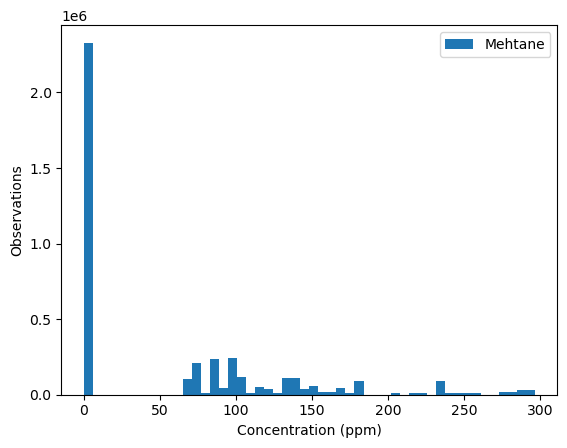

In [79]:
plt.hist(df.Methane, 50, label="Mehtane")
plt.legend(loc='upper right')
plt.xlabel("Concentration (ppm)")
plt.ylabel("Observations")

Text(0, 0.5, 'Observations')

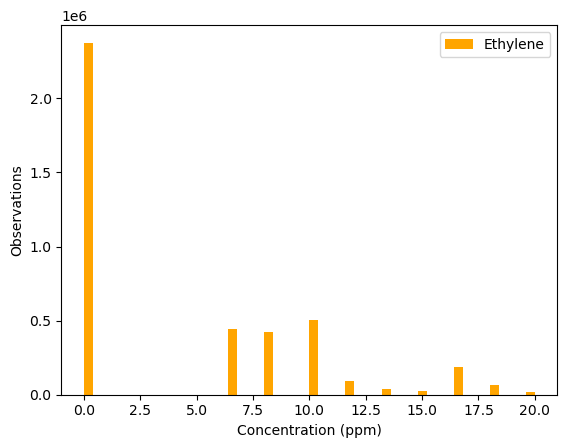

In [80]:
plt.hist(df.Ethylene, 50, label="Ethylene", color='orange')
plt.legend(loc='upper right')
plt.xlabel("Concentration (ppm)")
plt.ylabel("Observations")

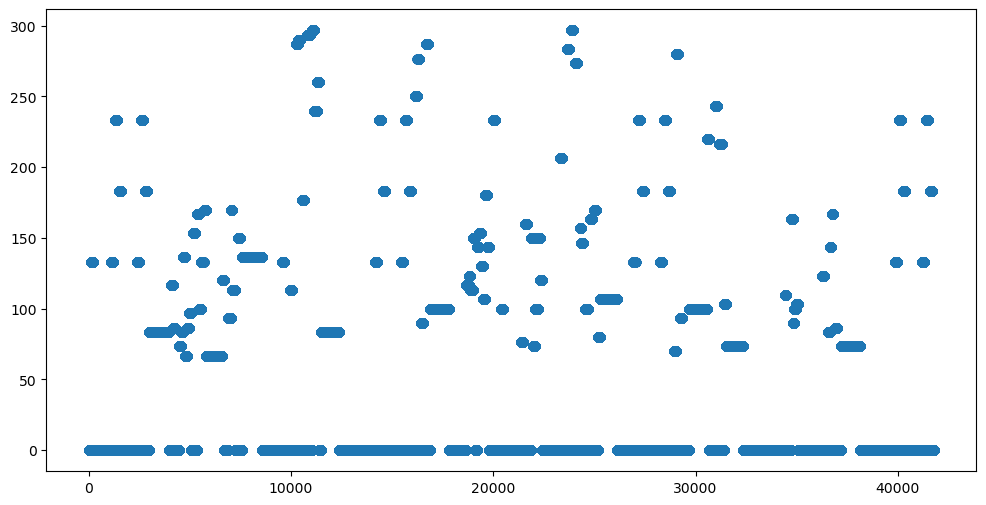

In [81]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Time'], df['Methane'])
plt.show()

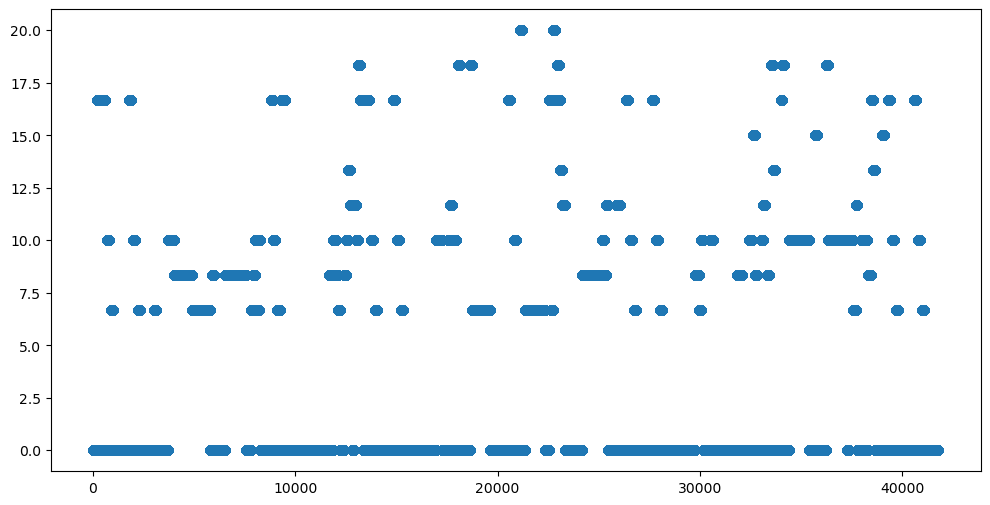

In [82]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Time'], df['Ethylene'])
plt.show()

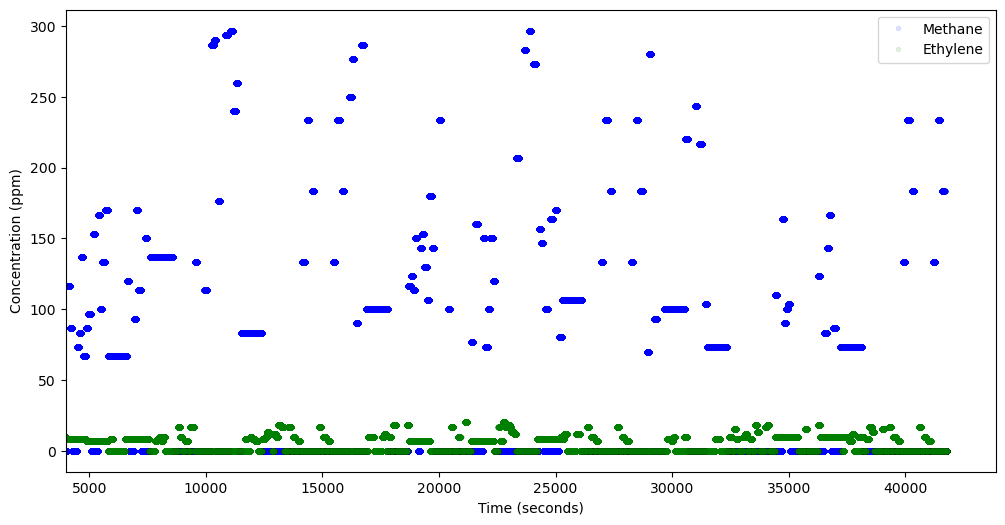

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Methane'], '.b', alpha=.1, label= 'Methane') 
plt.plot(df['Time'], df['Ethylene'], '.g', alpha=.1, label= 'Ethylene') # '.g' 点状绿色， alpha不透明度
plt.xlabel("Time (seconds)")
plt.ylabel("Concentration (ppm)")
plt.legend(labels= ['Methane', 'Ethylene'], loc="upper right")
plt.xlim(4000, ) # x轴下限为4000，无上限
plt.show()

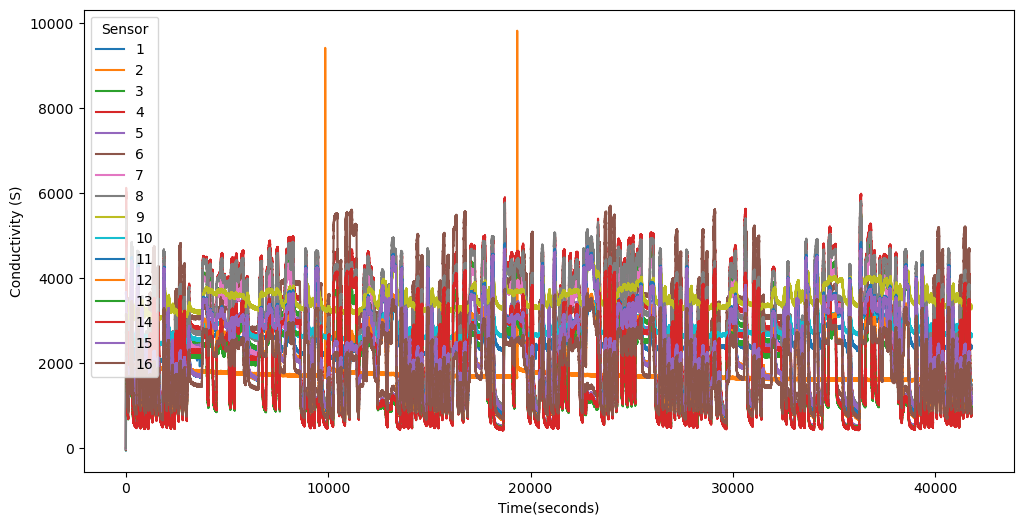

In [84]:
meth = df['1'] #提取数据
meth = meth[:100000] #保留前100000个数据
t = df['Time']
t = t[:100000]

plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['1'], label= '1')
plt.plot(df['Time'], df['2'], label= '2')
plt.plot(df['Time'], df['3'], label= '3')
plt.plot(df['Time'], df['4'], label= '4')
plt.plot(df['Time'], df['5'], label= '5')
plt.plot(df['Time'], df['6'], label= '6')
plt.plot(df['Time'], df['7'], label= '7')
plt.plot(df['Time'], df['8'], label= '8')
plt.plot(df['Time'], df['9'], label= '9')
plt.plot(df['Time'], df['10'], label= '10')
plt.plot(df['Time'], df['11'], label= '11')
plt.plot(df['Time'], df['12'], label= '12')
plt.plot(df['Time'], df['13'], label= '13')
plt.plot(df['Time'], df['14'], label= '14')
plt.plot(df['Time'], df['15'], label= '15')
plt.plot(df['Time'], df['16'], label= '16')
plt.xlabel('Time(seconds)')
plt.ylabel('Conductivity (S)')
plt.legend(loc='upper left', title='Sensor')
plt.show()

# plt.axis(xmin=0, xmax=10000)
# plt.show()

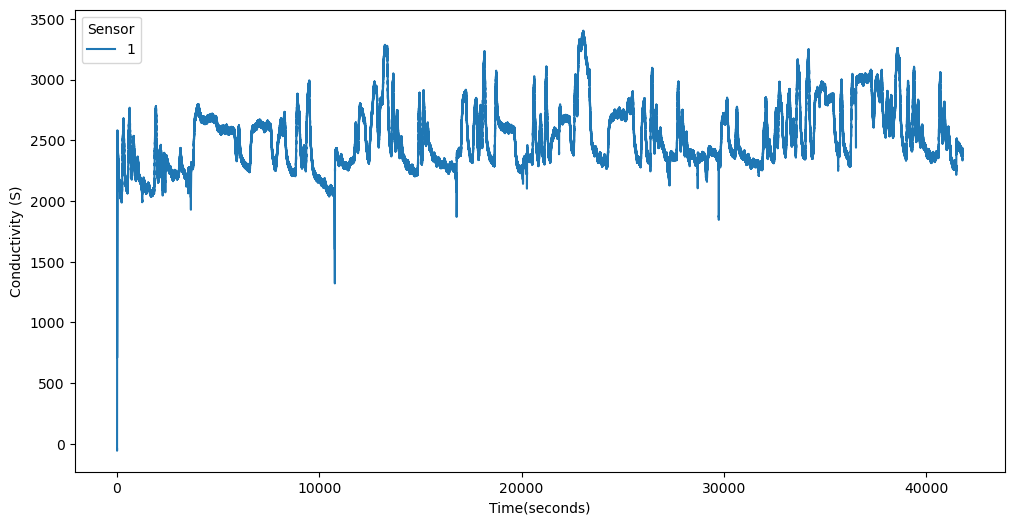

In [85]:
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['1'], label='1')
plt.xlabel('Time(seconds)')
plt.ylabel('Conductivity (S)')
plt.legend(loc='upper left', title='Sensor')
plt.show()

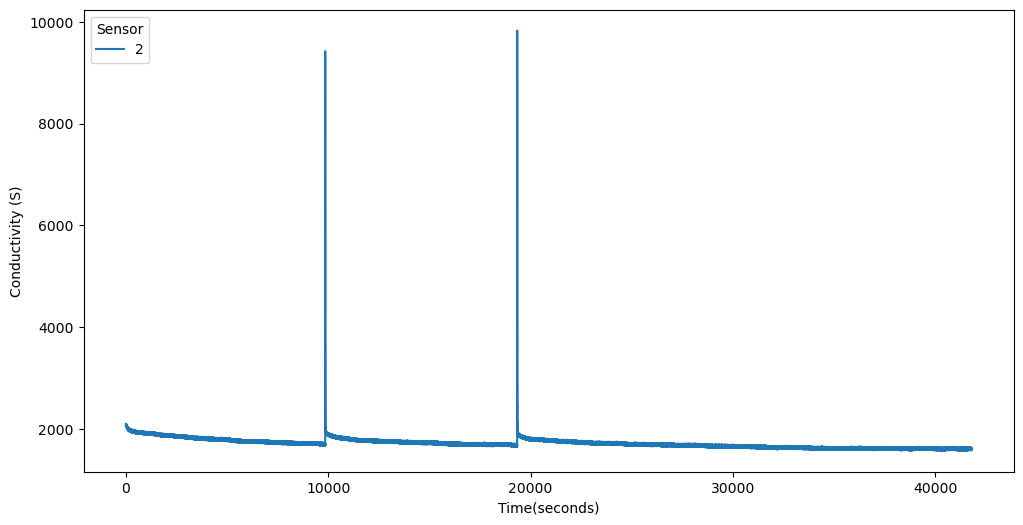

In [86]:
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['2'], label='2')
plt.xlabel('Time(seconds)')
plt.ylabel('Conductivity (S)')
plt.legend(loc='upper left', title='Sensor')
plt.show()

# 下面的4幅图要对四个传感器的数据图进行分类

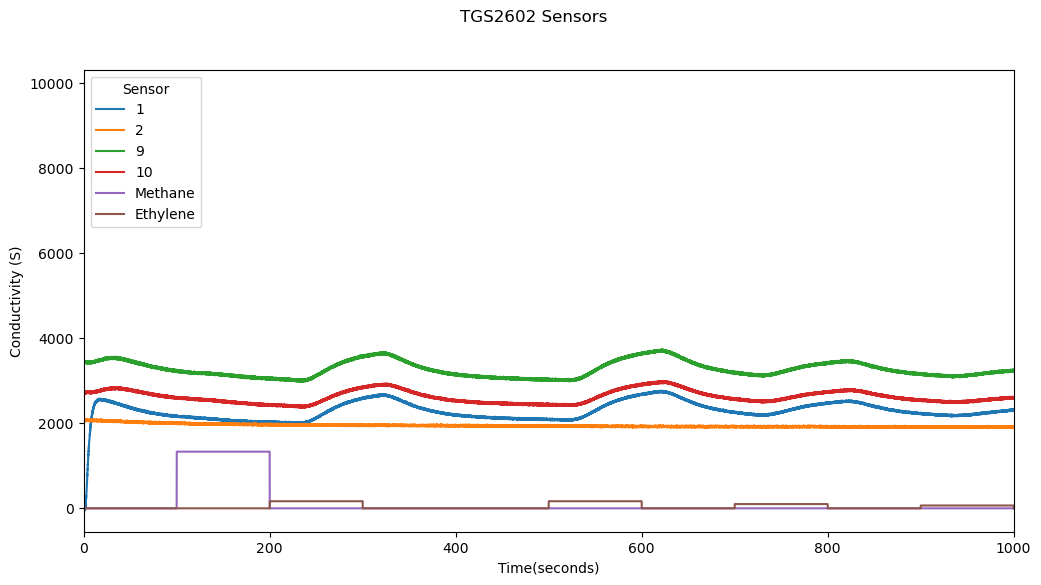

In [87]:
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['1'], label='1')
plt.plot(df['Time'], df['2'], label='2')
plt.plot(df['Time'], df['9'], label='9')
plt.plot(df['Time'], df['10'], label='10')

plt.plot(df['Time'], 10*df['Methane'], label='Methane')
plt.plot(df['Time'], 10*df['Ethylene'], label='Ethylene')

plt.xlabel('Time(seconds)')
plt.ylabel('Conductivity (S)')
plt.axis(xmin=0, xmax=1000)
plt.legend(loc='upper left', title='Sensor') 
plt.suptitle("TGS2602 Sensors") # 档案中有写传感器的编号
plt.show()

# 该传感器仅对乙烯有反应


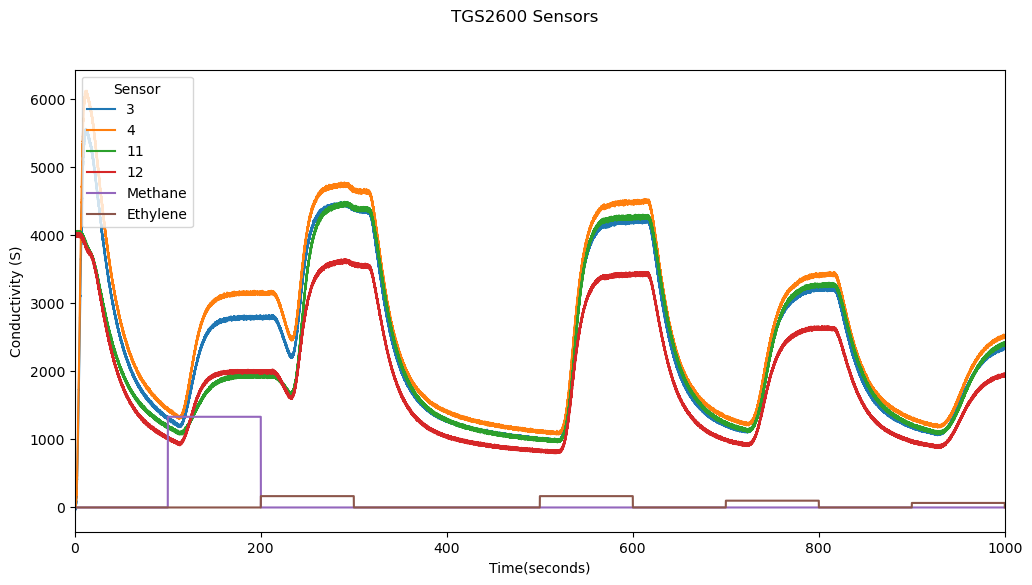

In [88]:
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['3'], label='3')
plt.plot(df['Time'], df['4'], label='4')

plt.plot(df['Time'], df['11'], label='11')
plt.plot(df['Time'], df['12'], label='12')

# plt.plot(df['Time'], df['8'], label='8')
# plt.plot(df['Time'], df['7'], label='7')

plt.plot(df['Time'], 10*df['Methane'], label='Methane')
plt.plot(df['Time'], 10*df['Ethylene'], label='Ethylene')

plt.xlabel('Time(seconds)')
plt.ylabel('Conductivity (S)')
plt.axis(xmin=0, xmax=1000)
plt.legend(loc='upper left', title='Sensor')
plt.suptitle("TGS2600 Sensors")
plt.show()

# 根据图谱推测，该传感器对两种气体都有反应，但对乙烯的选择性更大

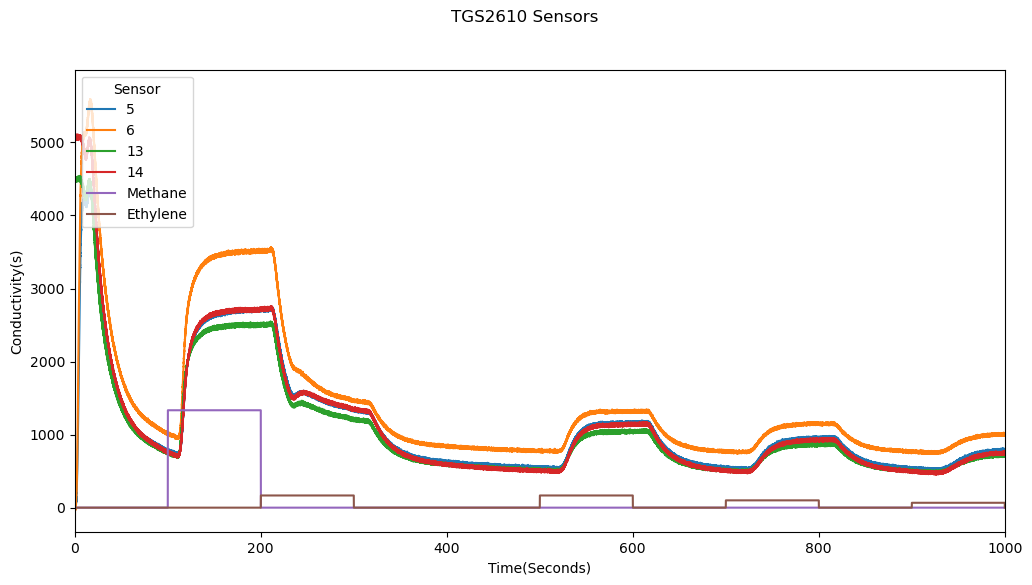

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['5'], label='5')
plt.plot(df['Time'], df['6'], label='6')

plt.plot(df['Time'], df['13'], label='13')
plt.plot(df['Time'], df['14'], label='14')

plt.plot(df['Time'], 10*df['Methane'], label='Methane')
plt.plot(df['Time'], 10*df['Ethylene'], label='Ethylene')

plt.xlabel("Time(Seconds)")
plt.ylabel("Conductivity(s)")
plt.axis(xmin=0, xmax=1000)
plt.suptitle("xxxSensor")
plt.legend(loc='upper left', title='Sensor')
plt.suptitle("TGS2610 Sensors")
plt.show()

# 根据图谱推测，该传感器对两种气体都有反应，但对甲烷的选择性更大


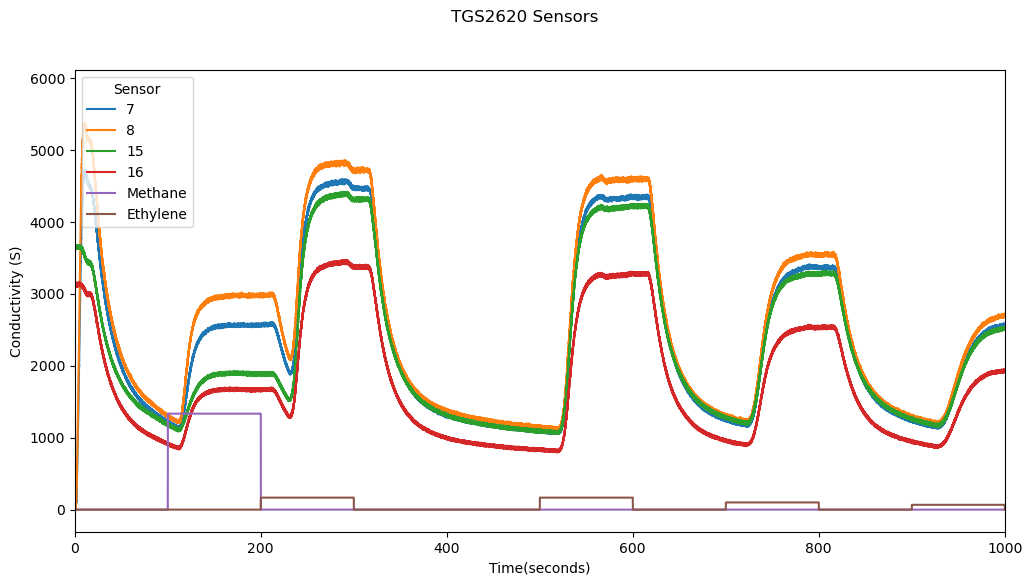

In [90]:
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['7'], label='7')
plt.plot(df['Time'], df['8'], label='8')

plt.plot(df['Time'], df['15'], label='15')
plt.plot(df['Time'], df['16'], label='16')

plt.plot(df['Time'], 10*df['Methane'], label='Methane')
plt.plot(df['Time'], 10*df['Ethylene'], label='Ethylene')

plt.xlabel('Time(seconds)')
plt.ylabel('Conductivity (S)')
plt.axis(xmin=0, xmax=1000)
plt.legend(loc='upper left', title='Sensor')
plt.suptitle("TGS2620 Sensors")
plt.show()

# 根据图谱推测，该传感器对两种气体都有反应，但对乙烯的选择性更大


# 数据归一化处理

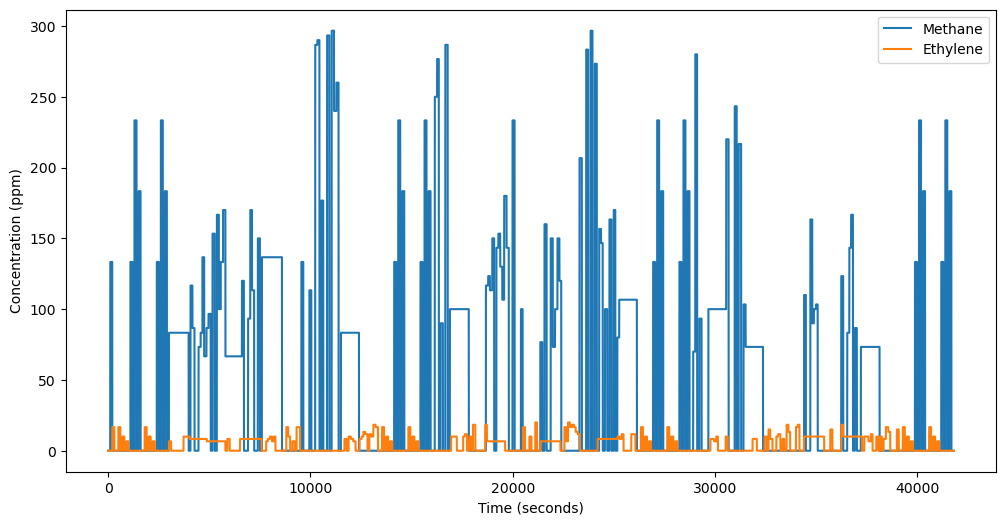

In [91]:
# Methane and Ethylene input
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Methane'], label='Methane')
plt.plot(df['Time'], df['Ethylene'], label='Ethylene')
plt.xlabel("Time (seconds)")
plt.ylabel("Concentration (ppm)")
plt.legend(loc='upper right')
plt.show()

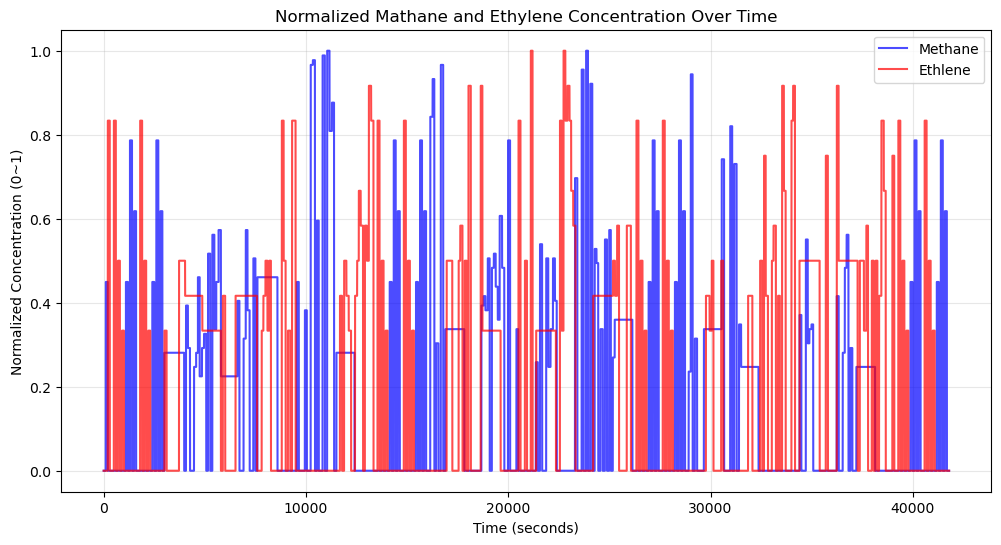

In [92]:
from sklearn.preprocessing import MinMaxScaler

e = df[['Methane', 'Ethylene']].values # 转换为列向量
scaled_data = MinMaxScaler().fit_transform(e) # 归一化

plt.figure(figsize=(12, 6))
plt.plot(df['Time'], scaled_data[:, 0], label='Methane', color='blue', alpha=0.7) # 取首列数据
plt.plot(df['Time'], scaled_data[:, 1], label='Ethlene', color='red', alpha=0.7) 
plt.legend(loc='upper right')
plt.xlabel('Time (seconds)')
plt.ylabel('Normalized Concentration (0~1)')
plt.title('Normalized Mathane and Ethylene Concentration Over Time')
plt.grid(True, alpha=0.3) # 添加网格线
plt.show()

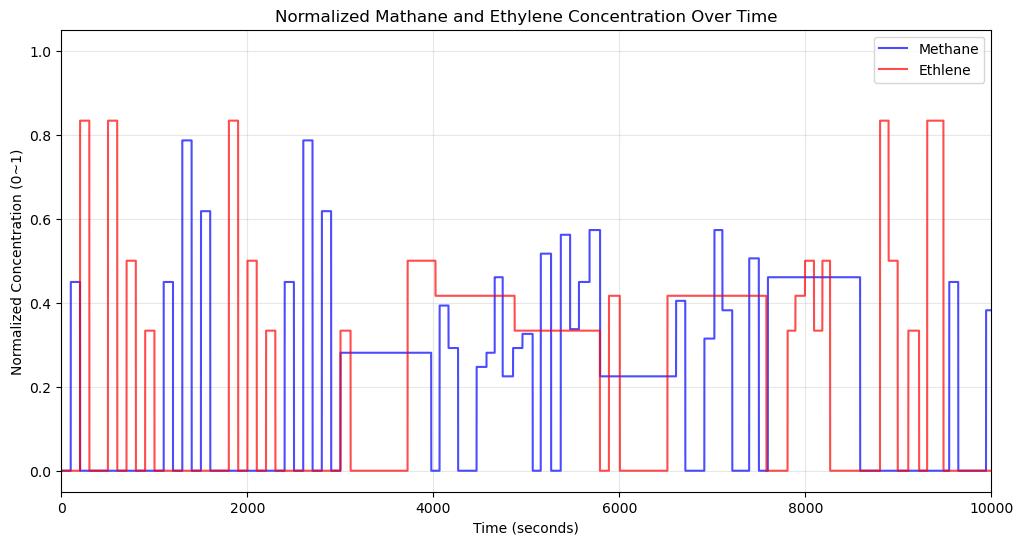

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], scaled_data[:, 0], label='Methane', color='blue', alpha=0.7) # 取首列数据
plt.plot(df['Time'], scaled_data[:, 1], label='Ethlene', color='red', alpha=0.7) 
plt.axis(xmin=0, xmax=10000)
plt.legend(loc='upper right')
plt.xlabel('Time (seconds)')
plt.ylabel('Normalized Concentration (0~1)')
plt.title('Normalized Mathane and Ethylene Concentration Over Time')
plt.grid(True, alpha=0.3) # 添加网格线
plt.show()

划分训练集和测试集

In [94]:
from sklearn.model_selection import train_test_split

x1 = df[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']]
y1_meth = df['Methane Bin']
y2_ethy = df['Ethylene Bin']

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x1, y1_meth, test_size=0.50, random_state=42)
# train_test_split（特征数据（自变量）， 目标数据（因变量）) # 因为这组数据集混合了甲烷和乙烯，得分开进行分类预测
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x1, y2_ethy, test_size=0.50, random_state=42)

# LDA 50/50

Methane Accuracy = 0.9331

 Classification Report:
              precision    recall  f1-score   support

  No Mathane       0.95      0.93      0.94   1165323
     Mathane       0.91      0.94      0.93    923929

    accuracy                           0.93   2089252
   macro avg       0.93      0.93      0.93   2089252
weighted avg       0.93      0.93      0.93   2089252



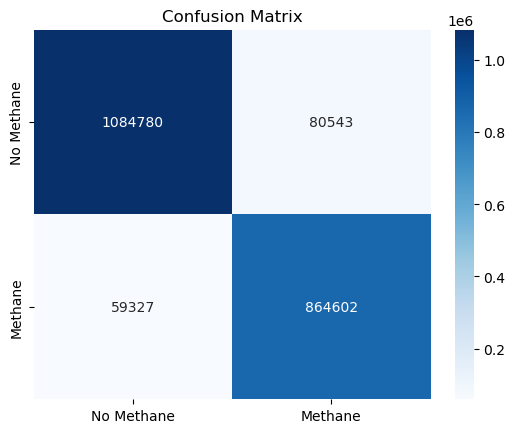

Ethylene Accuracy = 0.9049

 Classification Report:
              precision    recall  f1-score   support

 No Ethylene       0.90      0.94      0.92   1188213
    Ethylene       0.91      0.86      0.89    901039

    accuracy                           0.90   2089252
   macro avg       0.91      0.90      0.90   2089252
weighted avg       0.91      0.90      0.90   2089252



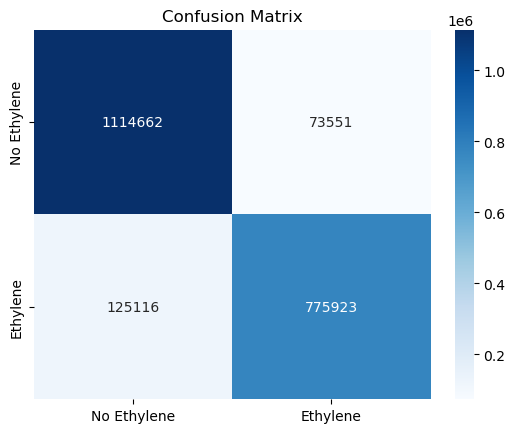

In [95]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver='svd') # 使用SVD求解器，适合高维数据或特征数>样本数的情况

# 训练并预测
ytest_pred_lda = lda.fit(x_train_1.values, y_train_1.values).predict(x_test_1.values)
ytest_pred_lda_2 = lda.fit(x_train_2.values, y_train_2.values).predict(x_test_2.values)

# Methane LDA model Stats

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 评估1
print(f"Methane Accuracy = {accuracy_score(y_test_1, ytest_pred_lda):.4f}")
print("\n Classification Report:")
print(classification_report(y_test_1, ytest_pred_lda, target_names=['No Mathane', 'Mathane']))

import seaborn as sns
# 混淆矩阵, 热力图
cm = confusion_matrix(y_test_1, ytest_pred_lda)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Methane', 'Methane'],
            yticklabels=['No Methane', 'Methane'])
plt.title('Confusion Matrix')
plt.show()

# 评估2
print(f"Ethylene Accuracy = {accuracy_score(y_test_2, ytest_pred_lda_2):.4f}")
print("\n Classification Report:")
print(classification_report(y_test_2, ytest_pred_lda_2, target_names=['No Ethylene', 'Ethylene']))

import seaborn as sns
# 混淆矩阵, 热力图
cm = confusion_matrix(y_test_2, ytest_pred_lda_2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Ethylene', 'Ethylene'],
            yticklabels=['No Ethylene', 'Ethylene'])
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression 50/50 （二分类模型）

Methane Logistic Regression model Accuracy = 0.9403


Methane Logistic Regression model Classification Report
              precision    recall  f1-score   support

  No Methane       0.95      0.94      0.95   1165323
     Methane       0.93      0.94      0.93    923929

    accuracy                           0.94   2089252
   macro avg       0.94      0.94      0.94   2089252
weighted avg       0.94      0.94      0.94   2089252



Logistic Regression Methane Confusion Matrix


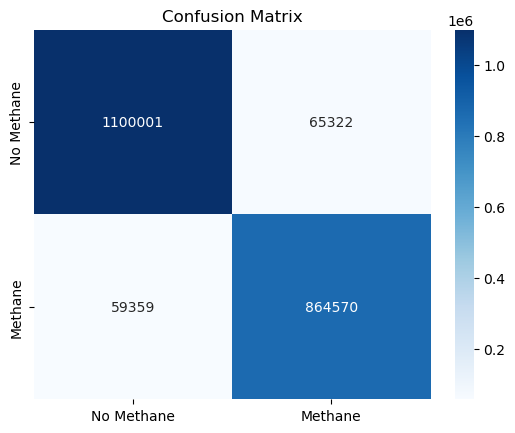

Ethylene Logistic Regression model Accuracy = 0.9131


Ethylene Logistic Regression model Classification Report
              precision    recall  f1-score   support

 No Ethylene       0.95      0.94      0.95   1165323
    Ethylene       0.93      0.94      0.93    923929

    accuracy                           0.94   2089252
   macro avg       0.94      0.94      0.94   2089252
weighted avg       0.94      0.94      0.94   2089252



Logistic Regression Ethylene Confusion Matrix


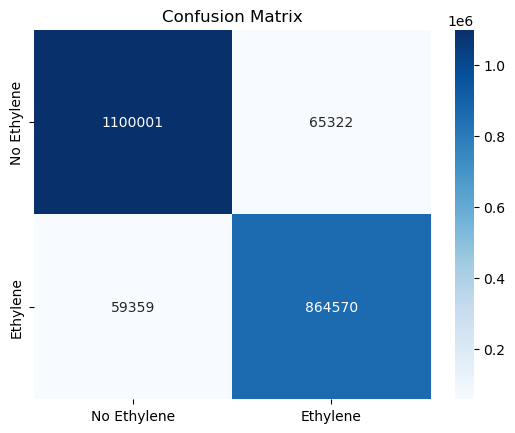

In [96]:
import sklearn.linear_model as sk_lm
import sklearn.metrics as sm

lr = sk_lm.LogisticRegression(solver='newton-cg', n_jobs=1)

# Methane Fit
y_pred_lr1 = lr.fit(x_train_1.values, y_train_1.values).predict(x_test_1.values)

# Ethylent Fit
y_pred_lr2 = lr.fit(x_train_2.values, y_train_2.values).predict(x_test_2.values)

lr_score1 = sm.accuracy_score(y_test_1, y_pred_lr1)

print(f"Methane Logistic Regression model Accuracy = {lr_score1:.4f}")
print("\n")
print("Methane Logistic Regression model Classification Report")
print(classification_report(y_test_1, y_pred_lr1, target_names=['No Methane', 'Methane']))

# 混淆矩阵, 热力图, Methane
print("\n")
print("Logistic Regression Methane Confusion Matrix")
cm = confusion_matrix(y_test_1, y_pred_lr1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Methane', 'Methane'],
            yticklabels=['No Methane', 'Methane'])
plt.title('Confusion Matrix')
plt.show()

lr_score2 = sm.accuracy_score(y_test_2, y_pred_lr2)
print(f"Ethylene Logistic Regression model Accuracy = {lr_score2:.4f}")
print("\n")
print("Ethylene Logistic Regression model Classification Report")
print(classification_report(y_test_1, y_pred_lr1, target_names=['No Ethylene', 'Ethylene']))

# 混淆矩阵, 热力图, Ethylene
print("\n")
print("Logistic Regression Ethylene Confusion Matrix")
cm = confusion_matrix(y_test_1, y_pred_lr1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Ethylene', 'Ethylene'],
            yticklabels=['No Ethylene', 'Ethylene'])
plt.title('Confusion Matrix')
plt.show()

# Preprocessing
1. 经上述分析可知，Sensor2出现异常，需删除。
2. 分析Sensor2的图形，分别在10000s和20000s处出现波动。所以后续分析将优化前20000s

/var/folders/47/s43kdzn9469f08xhd69md8_h0000gn/T/ipykernel_57583/3444246204.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', title='Sensor')


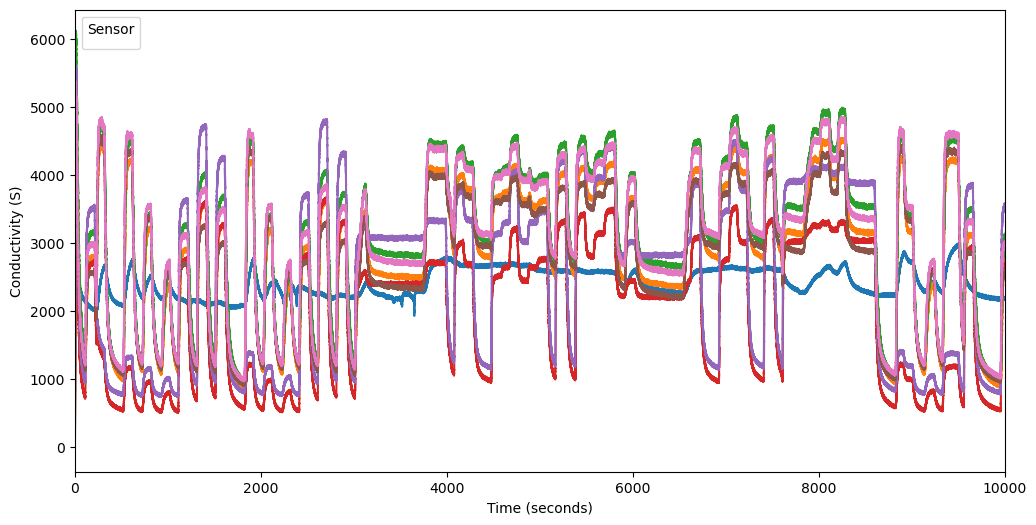

In [97]:
df2 = df.drop(columns='2')
plt.figure(figsize=(12, 6))
plt.plot(df2['Time'], df['1'])
plt.plot(df2['Time'], df['3'])
plt.plot(df2['Time'], df['4'])
plt.plot(df2['Time'], df['5'])
plt.plot(df2['Time'], df['6'])
plt.plot(df2['Time'], df['7'])
plt.plot(df2['Time'], df['8'])
plt.axis(xmin=0, xmax=10000)

plt.xlabel('Time (seconds)')
plt.ylabel('Conductivity (S)')
plt.legend(loc='upper left', title='Sensor')

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df3 = df2[20000:]
x2 = scaler.fit_transform(df3[['1', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']].values)
ym2 = df3['Methane Bin'].values
ye2 = df3['Ethylene Bin'].values
y2 = df3[['Methane Bin', 'Ethylene Bin']].values
x_train_df2, x_test_df2, y_train_1_df2, y_test_1_df2, y_train_2_df2, y_test_2_df2 = train_test_split(x2, ym2, ye2, test_size=0.50, random_state=42)

import sklearn.metrics as sm

ymtest_pred_lda = lda.fit(x_train_df2, y_train_1_df2).predict(x_test_df2)
yetest_pred_lda = lda.fit(x_train_df2, y_train_2_df2).predict(x_test_df2)

print(f"Ethylene LDA Accuracy = {sm.accuracy_score(y_test_1_df2, ymtest_pred_lda):.4f}")
print(f"Methane LDA Accuracy = {sm.accuracy_score(y_test_2_df2, yetest_pred_lda):.4f}")

lr = sk_lm.LogisticRegression(solver='newton-cg', n_jobs=1) 
ymtest_pred_lr = lr.fit(x_train_df2, y_train_1_df2).predict(x_test_df2)
yetest_pred_lr = lr.fit(x_train_df2, y_train_2_df2).predict(x_test_df2)

print(f"Ethylene Logistic Regression Accuracy = {sm.accuracy_score(y_test_1_df2, ymtest_pred_lr):.4f}")
print(f"Methane Logistic Regression Accuracy = {sm.accuracy_score(y_test_2_df2, yetest_pred_lr):.4f}")

Ethylene LDA Accuracy = 0.9390
Methane LDA Accuracy = 0.9045
Ethylene Logistic Regression Accuracy = 0.9436
Methane Logistic Regression Accuracy = 0.9125


Cross Validation Analysis

In [99]:
from sklearn.model_selection import cross_val_score, KFold

k2_acc = cross_val_score(lda, x2, ym2, cv=2, scoring="accuracy")
k5_acc = cross_val_score(lda, x2, ym2, cv=5, scoring="accuracy")

k2_mean = np.mean(k2_acc).round(4) # 取平均值
k5_mean = np.mean(k5_acc).round(4)

print("Model accuracy running cross validation with two k-folds:", k2_mean)
print("Model accuracy running cross validation with five k-folds:", k5_mean)

Model accuracy running cross validation with two k-folds: 0.9395
Model accuracy running cross validation with five k-folds: 0.9384


Given similar results of the cross validations, we will use half the data for training for model development.

# PCA

In [100]:
ind = df3.index
ind

RangeIndex(start=20000, stop=4178504, step=1)

[7.10582032e-01 2.48628804e-01 3.54876889e-02 2.37563934e-03
 2.22931088e-03 3.16522677e-04 1.85311710e-04 6.85625441e-05
 4.67111025e-05 2.57876637e-05 2.04403337e-05 1.28335337e-05
 1.07528499e-05 5.52821673e-06 4.07449337e-06]
[0.71058203 0.95921084 0.99469852 0.99707416 0.99930347 0.99962
 0.99980531 0.99987387 0.99992058 0.99994637 0.99996681 0.99997964
 0.9999904  0.99999593 1.        ]


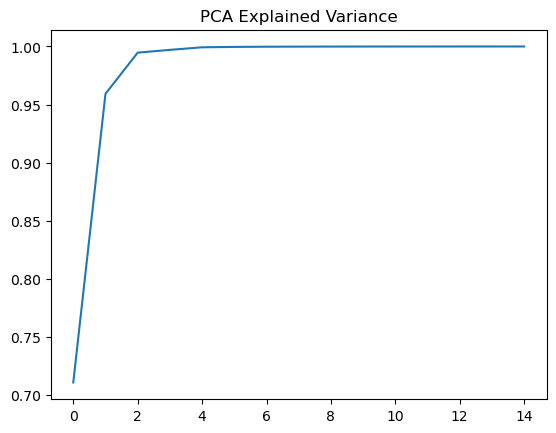

In [101]:
sc = StandardScaler()
a = sc.fit_transform(df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].values)
dft = pd.DataFrame(a, index=ind, columns=['1s', '3s', '4s', '5s', '6s', '7s', '8s', '9s', '10s', '11s', '12s', '13s', '14s', '15s', '16s'])
df4 = pd.concat([df3, dft], axis=1)

x = df4[['1s', '3s', '4s', '5s', '6s', '7s', '8s', '9s', '10s', '11s', '12s', '13s', '14s', '15s', '16s']]
y_meth = df4['Methane Bin']
y_ethy = df4['Ethylene Bin']

x_train, x_test, y_train_meth_pca, y_test_meth_pca,  y_train_ethy_pca, y_test_ethy_pca = train_test_split(x, y_meth, y_ethy, test_size=0.5, random_state=42)

from sklearn.decomposition import PCA

pca =PCA()
pca.fit(x_train)
print(pca.explained_variance_ratio_) # 方差解释比例
print(np.cumsum(pca.explained_variance_ratio_))
# 数组表示每个主成分捕捉了原始数据多少的信息

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA Explained Variance')
plt.show()

从方差分析数组中可以看出，第1主成分（PC1）占据了71.05%的方差，PC2占据了24.86%的方法。。。
随后看累计方差解释曲线，前三个方差基本捕获了全部信息。

[0.6598791296100713,
 0.902146541159994,
 0.9133587463183875,
 0.9275388457002807,
 0.9285026538389767,
 0.9387068041776562,
 0.9387457604946394,
 0.9356114602751374,
 0.9427726894094607,
 0.9432666170334332,
 0.9432560363053637,
 0.9436316521518315,
 0.943380600331273,
 0.9434873694963382,
 0.9436672418735199]

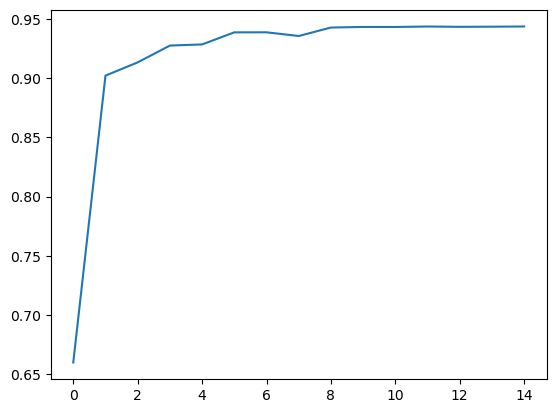

In [ ]:
# Methane 甲烷
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

accuracy_score_PCA = []
for i in range (1,16,1): # (start, stop, step)
    pred = lr.fit(x_train_pca[:, :i], y_train_meth_pca.values).predict(x_test_pca[:, :i]) # [行， 列]
    accuracy_score_PCA.append(sm.accuracy_score(y_test_meth_pca, pred))

plt.plot(accuracy_score_PCA)
accuracy_score_PCA

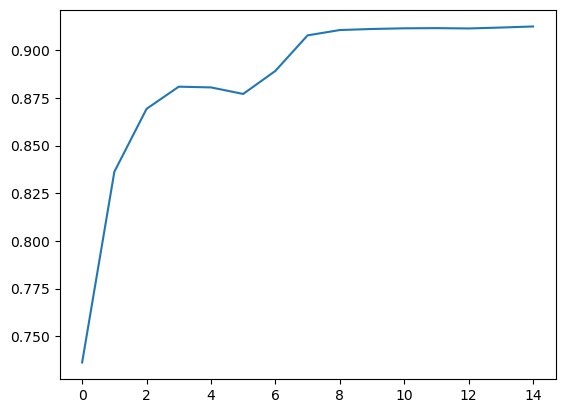

In [114]:
# Ethylene 乙烯

accuracy_score_PCA_eth = []
for i in range (1, 16, 1):
    pred2 = lr.fit(x_train_pca[:, :i], y_train_ethy_pca.values).predict(x_test_pca[:,:i])
    accuracy_score_PCA_eth.append(sm.accuracy_score(y_test_ethy_pca, pred2))

accuracy_score_PCA_eth
plt.plot(accuracy_score_PCA_eth)

对于甲烷图的分析，
​第1主成分​：准确率仅65.99%，效果较差
​第2主成分​：准确率跃升至90.21%​，这是最大的性能提升​
​第3-6主成分​：准确率持续提升，从91.34%到93.87%
​第8主成分及以后​：准确率在94.3%左右趋于平稳，波动很小

前几个主成分贡献列大部分价值，后续主成分的边际效益很低。

Text(0.5, 1.0, 'PC3')

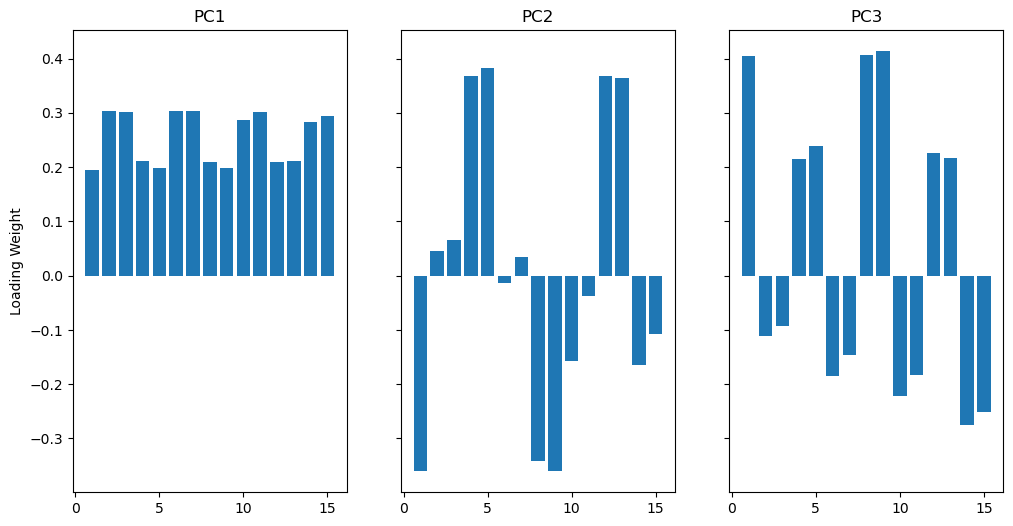

In [ ]:
# 主成分的可解释性分析
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (12,6))
ax1.bar(range(1, 16, 1),pca.components_[0]) 
ax1.set_title('PC1')
ax1.set_ylabel('Loading Weight')
ax2.bar(range(1, 16, 1),pca.components_[1])
ax2.set_title('PC2')
ax3.bar(range(1, 16, 1),pca.components_[2])
ax3.set_title('PC3')

根据前三个主成分载荷的分析，PC1中所有传感器贡献均匀，其中34，78，1112，1516表现突出，得出结论，TSG2600和TSG2620更为重要。

# Feature extraction

In [ ]:
# Extracting rolling or moving average

